<!-- dom:TITLE: Data Analysis and Machine Learning: Linear Regression and more Advanced Regression Analysis -->
# Data Analysis and Machine Learning: Linear Regression and more Advanced Regression Analysis
<!-- dom:AUTHOR: Morten Hjorth-Jensen at Department of Physics, University of Oslo & Department of Physics and Astronomy and National Superconducting Cyclotron Laboratory, Michigan State University -->
<!-- Author: -->  
**Morten Hjorth-Jensen**, Department of Physics, University of Oslo and Department of Physics and Astronomy and National Superconducting Cyclotron Laboratory, Michigan State University

Date: **Aug 24, 2018**

Copyright 1999-2018, Morten Hjorth-Jensen. Released under CC Attribution-NonCommercial 4.0 license




## Regression analysis, overarching aims

Regression modeling deals with the description of  the sampling distribution of a given random variable $y$ varies as function of another variable or a set of such variables $\hat{x} =[x_0, x_1,\dots, x_p]^T$. 
The first variable is called the **dependent**, the **outcome** or the **response** variable while the set of variables $\hat{x}$ is called the independent variable, or the predictor variable or the explanatory variable. 

A regression model aims at finding a likelihood function $p(y\vert \hat{x})$, that is the conditional distribution for $y$ with a given $\hat{x}$. The estimation of  $p(y\vert \hat{x})$ is made using a data set with 
* $n$ cases $i = 0, 1, 2, \dots, n-1$ 

* Response (dependent or outcome) variable $y_i$ with $i = 0, 1, 2, \dots, n-1$ 

* $p$ Explanatory (independent or predictor) variables $\hat{x}_i=[x_{i0}, x_{i1}, \dots, x_{ip}]$ with $i = 0, 1, 2, \dots, n-1$   

 The goal of the regression analysis is to extract/exploit relationship between $y_i$ and $\hat{x}_i$ in or to infer causal dependencies, approximations to the likelihood functions, functional relationships and to make predictions .




## General linear models
Before we proceed let us study a case from linear algebra where we aim at fitting a set of data $\hat{y}=[y_0,y_1,\dots,y_{n-1}]$. We could think of these data as a result of an experiment or a complicated numerical experiment. These data are functions of a series of variables $\hat{x}=[x_0,x_1,\dots,x_{n-1}]$, that is $y_i = y(x_i)$ with $i=0,1,2,\dots,n-1$. The variables $x_i$ could represent physical quantities like time, temperature, position etc. We assume that $y(x)$ is a smooth function. 

Since obtaining these data points may not be trivial, we want to use these data to fit a function which can allow us to make predictions for values of $y$ which are not in the present set. The perhaps simplest approach is to assume we can parametrize our function in terms of a polynomial of degree $n-1$ with $n$ points, that is

$$
y=y(x) \rightarrow y(x_i)=\tilde{y}_i+\epsilon_i=\sum_{j=0}^{n-1} \beta_i x_i^j+\epsilon_i,
$$

where $\epsilon_i$ is the error in our approximation.




## Rewriting the fitting procedure as a linear algebra problem
For every set of values $y_i,x_i$ we have thus the corresponding set of equations

$$
\begin{align*}
y_0&=\beta_0+\beta_1x_0^1+\beta_2x_0^2+\dots+\beta_{n-1}x_0^{n-1}+\epsilon_0\\
y_1&=\beta_0+\beta_1x_1^1+\beta_2x_1^2+\dots+\beta_{n-1}x_1^{n-1}+\epsilon_1\\
y_2&=\beta_0+\beta_1x_2^1+\beta_2x_2^2+\dots+\beta_{n-1}x_2^{n-1}+\epsilon_2\\
\dots & \dots \\
y_{n-1}&=\beta_0+\beta_1x_{n-1}^1+\beta_2x_{n-1}^2+\dots+\beta_1x_{n-1}^{n-1}+\epsilon_{n-1}.\\
\end{align*}
$$

## Rewriting the fitting procedure as a linear algebra problem, follows
Defining the vectors

$$
\hat{y} = [y_0,y_1, y_2,\dots, y_{n-1}]^T,
$$

and

$$
\hat{\beta} = [\beta_0,\beta_1, \beta_2,\dots, \beta_{n-1}]^T,
$$

and

$$
\hat{\epsilon} = [\epsilon_0,\epsilon_1, \epsilon_2,\dots, \epsilon_{n-1}]^T,
$$

and the matrix

$$
\hat{X}=
\begin{bmatrix} 
1& x_{0}^1 &x_{0}^2& \dots & \dots &x_{0}^{n-1}\\
1& x_{1}^1 &x_{1}^2& \dots & \dots &x_{1}^{n-1}\\
1& x_{2}^1 &x_{2}^2& \dots & \dots &x_{2}^{n-1}\\                      
\dots& \dots &\dots& \dots & \dots &\dots\\
1& x_{n-1}^1 &x_{n-1}^2& \dots & \dots &x_{n-1}^{n-1}\\
\end{bmatrix}
$$

we can rewrite our equations as

$$
\hat{y} = \hat{X}\hat{\beta}+\hat{\epsilon}.
$$

## Generalizing the fitting procedure as a linear algebra problem
We are obviously not limited to the above polynomial. We could replace the various powers of $x$ with elements of Fourier series, that is, instead of $x_i^j$ we could have $\cos{(j x_i)}$ or $\sin{(j x_i)}$, or time series or other orthogonal functions.
For every set of values $y_i,x_i$ we can then generalize the equations to

$$
\begin{align*}
y_0&=\beta_0x_{00}+\beta_1x_{01}+\beta_2x_{02}+\dots+\beta_{n-1}x_{0n-1}+\epsilon_0\\
y_1&=\beta_0x_{10}+\beta_1x_{11}+\beta_2x_{12}+\dots+\beta_{n-1}x_{1n-1}+\epsilon_1\\
y_2&=\beta_0x_{20}+\beta_1x_{21}+\beta_2x_{22}+\dots+\beta_{n-1}x_{2n-1}+\epsilon_2\\
\dots & \dots \\
y_{i}&=\beta_0x_{i0}+\beta_1x_{i1}+\beta_2x_{i2}+\dots+\beta_{n-1}x_{in-1}+\epsilon_i\\
\dots & \dots \\
y_{n-1}&=\beta_0x_{n-1,0}+\beta_1x_{n-1,2}+\beta_2x_{n-1,2}+\dots+\beta_1x_{n-1,n-1}+\epsilon_{n-1}.\\
\end{align*}
$$

## Generalizing the fitting procedure as a linear algebra problem
We redefine in turn the matrix $\hat{X}$ as

$$
\hat{X}=
\begin{bmatrix} 
x_{00}& x_{01} &x_{02}& \dots & \dots &x_{0,n-1}\\
x_{10}& x_{11} &x_{12}& \dots & \dots &x_{1,n-1}\\
x_{20}& x_{21} &x_{22}& \dots & \dots &x_{2,n-1}\\                      
\dots& \dots &\dots& \dots & \dots &\dots\\
x_{n-1,0}& x_{n-1,1} &x_{n-1,2}& \dots & \dots &x_{n-1,n-1}\\
\end{bmatrix}
$$

and without loss of generality we rewrite again  our equations as

$$
\hat{y} = \hat{X}\hat{\beta}+\hat{\epsilon}.
$$

The left-hand side of this equation forms know. Our error vector $\hat{\epsilon}$ and the parameter vector $\hat{\beta}$ are our unknow quantities. How can we obtain the optimal set of $\beta_i$ values?




## Optimizing our parameters
We have defined the matrix $\hat{X}$

$$
\begin{align*}
y_0&=\beta_0x_{00}+\beta_1x_{01}+\beta_2x_{02}+\dots+\beta_{n-1}x_{0n-1}+\epsilon_0\\
y_1&=\beta_0x_{10}+\beta_1x_{11}+\beta_2x_{12}+\dots+\beta_{n-1}x_{1n-1}+\epsilon_1\\
y_2&=\beta_0x_{20}+\beta_1x_{21}+\beta_2x_{22}+\dots+\beta_{n-1}x_{2n-1}+\epsilon_1\\
\dots & \dots \\
y_{i}&=\beta_0x_{i0}+\beta_1x_{i1}+\beta_2x_{i2}+\dots+\beta_{n-1}x_{in-1}+\epsilon_1\\
\dots & \dots \\
y_{n-1}&=\beta_0x_{n-1,0}+\beta_1x_{n-1,2}+\beta_2x_{n-1,2}+\dots+\beta_1x_{n-1,n-1}+\epsilon_{n-1}.\\
\end{align*}
$$

## Optimizing our parameters, more details
We well use this matrix to define the approximation $\hat{\tilde{y}}$ via the unknown quantity $\hat{\beta}$ as

$$
\hat{\tilde{y}}= \hat{X}\hat{\beta},
$$

and in order to find the optimal parameters $\beta_i$ instead of solving the above linear algebra problem, we define a function which gives a measure of the spread between the values $y_i$ (which represent hopefully the exact values) and the parametrized values $\tilde{y}_i$, namely

$$
Q(\hat{\beta})=\sum_{i=0}^{n-1}\left(y_i-\tilde{y}_i\right)^2=\left(\hat{y}-\hat{\tilde{y}}\right)^T\left(\hat{y}-\hat{\tilde{y}}\right),
$$

or using the matrix $\hat{X}$ as

$$
Q(\hat{\beta})=\left(\hat{y}-\hat{X}\hat{\beta}\right)^T\left(\hat{y}-\hat{X}\hat{\beta}\right).
$$

## Interpretations and optimizing our parameters
The function

$$
Q(\hat{\beta})=\left(\hat{y}-\hat{X}\hat{\beta}\right)^T\left(\hat{y}-\hat{X}\hat{\beta}\right),
$$

can be linked to the variance of the quantity $y_i$ if we interpret the latter as the mean value of for example a numerical  experiment. When linking below with the maximum likelihood approach below, we will indeed interpret $y_i$ as a mean value

$$
y_{i}=\langle y_i \rangle = \beta_0x_{i,0}+\beta_1x_{i,1}+\beta_2x_{i,2}+\dots+\beta_{n-1}x_{i,n-1}+\epsilon_i,
$$

where $\langle y_i \rangle$ is the mean value. Keep in mind also that till now  we have treated $y_i$ as the exact value. Normally, the response (dependent or outcome) variable $y_i$ the outcome of a numerical experiment or another type of experiment and is thus only an approximation to the true value. It is then always accompanied by an error estimate, often limited to a statistical error estimate given by the standard deviation discussed earlier. In the discussion here we will treat $y_i$ as our exact value for the response variable.

In order to find the parameters $\beta_i$ we will then minimize the spread of $Q(\hat{\beta})$ by requiring

$$
\frac{\partial Q(\hat{\beta})}{\partial \beta_j} = \frac{\partial }{\partial \beta_j}\left[ \sum_{i=0}^{n-1}\left(y_i-\beta_0x_{i,0}-\beta_1x_{i,1}-\beta_2x_{i,2}-\dots-\beta_{n-1}x_{i,n-1}\right)^2\right]=0,
$$

which results in

$$
\frac{\partial Q(\hat{\beta})}{\partial \beta_j} = -2\left[ \sum_{i=0}^{n-1}x_{ij}\left(y_i-\beta_0x_{i,0}-\beta_1x_{i,1}-\beta_2x_{i,2}-\dots-\beta_{n-1}x_{i,n-1}\right)\right]=0,
$$

or in a matrix-vector form as

$$
\frac{\partial Q(\hat{\beta})}{\partial \hat{\beta}} = 0 = \hat{X}^T\left( \hat{y}-\hat{X}\hat{\beta}\right).
$$

## Interpretations and optimizing our parameters
We can rewrite

$$
\frac{\partial Q(\hat{\beta})}{\partial \hat{\beta}} = 0 = \hat{X}^T\left( \hat{y}-\hat{X}\hat{\beta}\right),
$$

as

$$
\hat{X}^T\hat{y} = \hat{X}^T\hat{X}\hat{\beta},
$$

and if the matrix $\hat{X}^T\hat{X}$ is invertible we have the solution

$$
\hat{\beta} =\left(\hat{X}^T\hat{X}\right)^{-1}\hat{X}^T\hat{y}.
$$

## Interpretations and optimizing our parameters
The residuals $\hat{\epsilon}$ are in turn given by

$$
\hat{\epsilon} = \hat{y}-\hat{\tilde{y}} = \hat{y}-\hat{X}\hat{\beta},
$$

and with

$$
\hat{X}^T\left( \hat{y}-\hat{X}\hat{\beta}\right)= 0,
$$

we have

$$
\hat{X}^T\hat{\epsilon}=\hat{X}^T\left( \hat{y}-\hat{X}\hat{\beta}\right)= 0,
$$

meaning that the solution for $\hat{\beta}$ is the one which minimizes the residuals.  Later we will link this with the maximum likelihood approach.




## The $\chi^2$ function

Normally, the response (dependent or outcome) variable $y_i$ the outcome of a numerical experiment or another type of experiment and is thus only an approximation to the true value. It is then always accompanied by an error estimate, often limited to a statistical error estimate given by the standard deviation discussed earlier. In the discussion here we will treat $y_i$ as our exact value for the response variable.

Introducing the standard deviation $\sigma_i$ for each measurement $y_i$, we define now the $\chi^2$ function as

$$
\chi^2(\hat{\beta})=\sum_{i=0}^{n-1}\frac{\left(y_i-\tilde{y}_i\right)^2}{\sigma_i^2}=\left(\hat{y}-\hat{\tilde{y}}\right)^T\frac{1}{\hat{\Sigma^2}}\left(\hat{y}-\hat{\tilde{y}}\right),
$$

where the matrix $\hat{\Sigma}$ is a diagonal matrix with $\sigma_i$ as matrix elements.



## The $\chi^2$ function

In order to find the parameters $\beta_i$ we will then minimize the spread of $\chi^2(\hat{\beta})$ by requiring

$$
\frac{\partial \chi^2(\hat{\beta})}{\partial \beta_j} = \frac{\partial }{\partial \beta_j}\left[ \sum_{i=0}^{n-1}\left(\frac{y_i-\beta_0x_{i,0}-\beta_1x_{i,1}-\beta_2x_{i,2}-\dots-\beta_{n-1}x_{i,n-1}}{\sigma_i}\right)^2\right]=0,
$$

which results in

$$
\frac{\partial \chi^2(\hat{\beta})}{\partial \beta_j} = -2\left[ \sum_{i=0}^{n-1}\frac{x_{ij}}{\sigma_i}\left(\frac{y_i-\beta_0x_{i,0}-\beta_1x_{i,1}-\beta_2x_{i,2}-\dots-\beta_{n-1}x_{i,n-1}}{\sigma_i}\right)\right]=0,
$$

or in a matrix-vector form as

$$
\frac{\partial \chi^2(\hat{\beta})}{\partial \hat{\beta}} = 0 = \hat{A}^T\left( \hat{b}-\hat{A}\hat{\beta}\right).
$$

where we have defined the matrix $\hat{A} =\hat{X}/\hat{\Sigma}$ with matrix elements $a_{ij} = x_{ij}/\sigma_i$ and the vector $\hat{b}$ with elements $b_i = y_i/\sigma_i$.



## The $\chi^2$ function

We can rewrite

$$
\frac{\partial \chi^2(\hat{\beta})}{\partial \hat{\beta}} = 0 = \hat{A}^T\left( \hat{b}-\hat{A}\hat{\beta}\right),
$$

as

$$
\hat{A}^T\hat{b} = \hat{A}^T\hat{A}\hat{\beta},
$$

and if the matrix $\hat{A}^T\hat{A}$ is invertible we have the solution

$$
\hat{\beta} =\left(\hat{A}^T\hat{A}\right)^{-1}\hat{A}^T\hat{b}.
$$

## The $\chi^2$ function

If we then introduce the matrix

$$
\hat{H} =  \left(\hat{A}^T\hat{A}\right)^{-1},
$$

we have then the following expression for the parameters $\beta_j$ (the matrix elements of $\hat{H}$ are $h_{ij}$)

$$
\beta_j = \sum_{k=0}^{p-1}h_{jk}\sum_{i=0}^{n-1}\frac{y_i}{\sigma_i}\frac{x_{ik}}{\sigma_i} = \sum_{k=0}^{p-1}h_{jk}\sum_{i=0}^{n-1}b_ia_{ik}
$$

We state without proof the expression for the uncertainty  in the parameters $\beta_j$ as (we leave this as an exercise)

$$
\sigma^2(\beta_j) = \sum_{i=0}^{n-1}\sigma_i^2\left( \frac{\partial \beta_j}{\partial y_i}\right)^2,
$$

resulting in

$$
\sigma^2(\beta_j) = \left(\sum_{k=0}^{p-1}h_{jk}\sum_{i=0}^{n-1}a_{ik}\right)\left(\sum_{l=0}^{p-1}h_{jl}\sum_{m=0}^{n-1}a_{ml}\right) = h_{jj}!
$$

## The $\chi^2$ function
The first step here is to approximate the function $y$ with a first-order polynomial, that is we write

$$
y=y(x) \rightarrow y(x_i) \approx \beta_0+\beta_1 x_i.
$$

By computing the derivatives of $\chi^2$ with respect to $\beta_0$ and $\beta_1$ show that these are given by

$$
\frac{\partial \chi^2(\hat{\beta})}{\partial \beta_0} = -2\left[ \sum_{i=0}^{n-1}\left(\frac{y_i-\beta_0-\beta_1x_{i}}{\sigma_i^2}\right)\right]=0,
$$

and

$$
\frac{\partial \chi^2(\hat{\beta})}{\partial \beta_0} = -2\left[ \sum_{i=0}^{n-1}x_i\left(\frac{y_i-\beta_0-\beta_1x_{i}}{\sigma_i^2}\right)\right]=0.
$$

## The $\chi^2$ function

For a linear fit we don't need to invert a matrix!!  
Defining

$$
\gamma =  \sum_{i=0}^{n-1}\frac{1}{\sigma_i^2},
$$

4
0
 
<
<
<
!
!
M
A
T
H
_
B
L
O
C
K

4
1
 
<
<
<
!
!
M
A
T
H
_
B
L
O
C
K

4
2
 
<
<
<
!
!
M
A
T
H
_
B
L
O
C
K

$$
\gamma_{xy} = \sum_{i=0}^{n-1}\frac{y_ix_{i}}{\sigma_i^2},
$$

we obtain

4
4
 
<
<
<
!
!
M
A
T
H
_
B
L
O
C
K

$$
\beta_1 = \frac{\gamma_{xy}\gamma-\gamma_x\gamma_y}{\gamma\gamma_{xx}-\gamma_x^2}.
$$

This approach (different linear and non-linear regression) suffers often from both being underdetermined and overdetermined in the unknown coefficients $\beta_i$.  A better approach is to use the Singular Value Decomposition (SVD) method discussed below. Or using Lasso and Ridge regression. See below.






## Simple regression model
We are now ready to write our first program which aims at solving the above linear regression equations. We start with data we have produced ourselves, in this case normally distributed random numbers along the $x$-axis. These numbers define then the value of a function $y(x)=4+3x+N(0,1)$. Thereafter we order the $x$ values and employ our linear regression algorithm to set up the best fit. Here we find it useful to use the numpy function $c\_$ arrays where arrays are stacked along their last axis after being upgraded to at least two dimensions with ones post-pended to the shape. The following examples help in understanding what happens

In [1]:
import numpy as np
print(np.c_[np.array([1,2,3]), np.array([4,5,6])])
print(np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])])

[[1 4]
 [2 5]
 [3 6]]
[[1 2 3 0 0 4 5 6]]


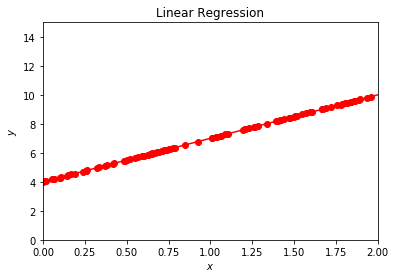

In [15]:
%matplotlib inline

# Importing various packages
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt

x = 2*np.random.rand(100,1)
y = 4+3*x+0.01*np.random.randn(100,1)

xb = np.c_[np.ones((100,1)), x]
beta = np.linalg.inv(xb.T.dot(xb)).dot(xb.T).dot(y)
xnew = np.array([[0],[2]])
xbnew = np.c_[np.ones((2,1)), xnew]
ypredict = xbnew.dot(beta)

plt.plot(xnew, ypredict, "r-")
plt.plot(x, y ,'ro')
plt.axis([0,2.0,0, 15.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Linear Regression')
plt.show()

We see that, as expected, a linear fit gives a seemingly (from the graph) good representation of the data.




## Simple regression model, now using **scikit-learn**


We can repeat the above algorithm using **scikit-learn** as follows

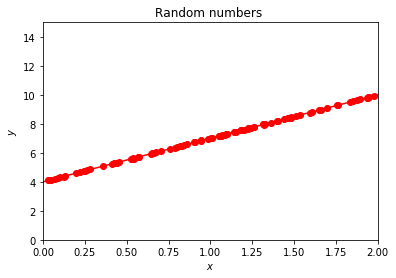

In [17]:
# Importing various packages
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x = 2*np.random.rand(100,1)
y = 4+3*x+0.01*np.random.randn(100,1)
linreg = LinearRegression()
linreg.fit(x,y)
xnew = np.array([[0],[2]])
ypredict = linreg.predict(xnew)

plt.plot(xnew, ypredict, "r-")
plt.plot(x, y ,'ro')
plt.axis([0,2.0,0, 15.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Random numbers ')
plt.show()

## Simple linear regression model using **scikit-learn**

We start with perhaps our simplest possible example, using **scikit-learn** to perform linear regression analysis on a data set produced by us. 
What follows is a simple Python code where we have defined  function $y$ in terms of the variable $x$. Both are defined as vectors of dimension $1\times 100$. The entries to the vector $\hat{x}$  are given by random numbers generated with a uniform distribution with entries $x_i \in [0,1]$ (more about probability distribution functions later). These values are then used to define a function $y(x)$ (tabulated again as a vector) with a linear dependence on $x$ plus a random noise added via the normal distribution.


The Numpy functions are imported used the **import numpy as np**
statement and the random number generator for the uniform distribution
is called using the function **np.random.rand()**, where we specificy
that we want $100$ random variables.  Using Numpy we define
automatically an array with the specified number of elements, $100$ in
our case.  With the Numpy function **randn()** we can compute random
numbers with the normal distribution (mean value $\mu$ equal to zero and
variance $\sigma^2$ set to one) and produce the values of $y$ assuming a linear
dependence as function of $x$

$$
y = 2x+N(0,1),
$$

where $N(0,1)$ represents random numbers generated by the normal
distribution.  From **scikit-learn** we import then the
**LinearRegression** functionality and make a prediction $\tilde{y} =
\alpha + \beta x$ using the function **fit(x,y)**. We call the set of
data $(\hat{x},\hat{y})$ for our training data. The Python package
**scikit-learn** has also a functionality which extracts the above
fitting parameters $\alpha$ and $\beta$ (see below). Later we will
distinguish between training data and test data.

For plotting we use the Python package
[matplotlib](https://matplotlib.org/) which produces publication
quality figures. Feel free to explore the extensive
[gallery](https://matplotlib.org/gallery/index.html) of examples. In
this example we plot our original values of $x$ and $y$ as well as the
prediction **ypredict** ($\tilde{y}$), which attempts at fitting our
data with a straight line.

The Python code follows here.

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


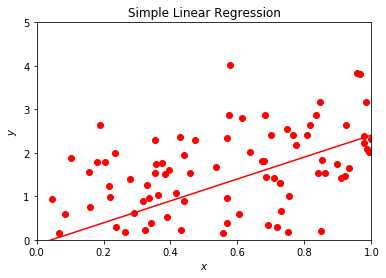

In [5]:
# Importing various packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x = np.random.rand(100,1)
y = 2*x+np.random.randn(100,1)
linreg = LinearRegression()
linreg.fit(x,y)
xnew = np.array([[0],[1]])
ypredict = linreg.predict(xnew)

plt.plot(xnew, ypredict, "r-")
plt.plot(x, y ,'ro')
plt.axis([0,1.0,0, 5.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Simple Linear Regression')
plt.show()

## Simple linear regression model

This example serves several aims. It allows us to demonstrate several
aspects of data analysis and later machine learning algorithms. The
immediate visualization shows that our linear fit is not
impressive. It goes through the data points, but there are many
outliers which are not reproduced by our linear regression.  We could
now play around with this small program and change for example the
factor in front of $x$ and the normal distribution.  Try to change the
function $y$ to

$$
y = 10x+0.01 \times N(0,1),
$$

where $x$ is defined as before.  


## Less noise

Does the fit look better? Indeed, by
reducing the role of the normal distribution we see immediately that
our linear prediction seemingly reproduces better the training
set. However, this testing 'by the eye' is obviouly not satisfactory in the
long run. Here we have only defined the training data and our model, and 
have not discussed a more rigorous approach to the **cost** function.


## How to study our fits

We need more rigorous criteria in defining whether we have succeeded or
not in modeling our training data.  You will be surprised to see that
many scientists seldomly venture beyond this 'by the eye' approach. A
standard approach for the *cost* function is the so-called $\chi^2$
function

$$
\chi^2 = \frac{1}{n}
\sum_{i=0}^{n-1}\frac{(y_i-\tilde{y}_i)^2}{\sigma_i^2},
$$

where $\sigma_i^2$ is the variance (to be defined later) of the entry
$y_i$.  We may not know the explicit value of $\sigma_i^2$, it serves
however the aim of scaling the equations and make the cost function
dimensionless.  


## Minimizing the cost function

Minimizing the cost function is a central aspect of
our discussions to come. Finding its minima as function of the model
parameters ($\alpha$ and $\beta$ in our case) will be a recurring
theme in these series of lectures. Essentially all machine learning
algorithms we will discuss center around the minimization of the
chosen cost function. This depends in turn on our specific
model for describing the data, a typical situation in supervised
learning. Automatizing the search for the minima of the cost function is a
central ingredient in all algorithms. Typical methods which are
employed are various variants of **gradient** methods. These will be
discussed in more detail later. Again, you'll be surprised to hear that
many practitioners minimize the above function ''by the eye', popularly dubbed as 
'chi by the eye'. That is, change a parameter and see (visually and numerically) that 
the  $\chi^2$ function becomes smaller. 

## Relative error

There are many ways to define the cost function. A simpler approach is to look at the relative difference between the training data and the predicted data, that is we define 
the relative error as

$$
\epsilon_{\mathrm{relative}}= \frac{\vert \hat{y} -\hat{\tilde{y}}\vert}{\vert \hat{y}\vert}.
$$

We can modify easily the above Python code and plot the relative error instead

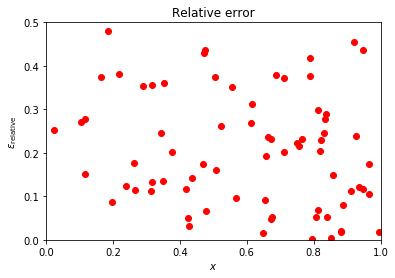

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x = np.random.rand(100,1)
y = 5*x+np.random.randn(100,1)
linreg = LinearRegression()
linreg.fit(x,y)
ypredict = linreg.predict(x)

plt.plot(x, np.abs(ypredict-y)/abs(y), "ro")
plt.axis([0,1.0,0.0, 0.5])
plt.xlabel(r'$x$')
plt.ylabel(r'$\epsilon_{\mathrm{relative}}$')
plt.title(r'Relative error')
plt.show()

Depending on the parameter in front of the normal distribution, we may
have a small or larger relative error. Try to play around with
different training data sets and study (graphically) the value of the
relative error.


## The richness of **scikit-learn**

As mentioned above, **scikit-learn** has an impressive functionality.
We can for example extract the values of $\alpha$ and $\beta$ and
their error estimates, or the variance and standard deviation and many
other properties from the statistical data analysis. 

Here we show an
example of the functionality of scikit-learn.

The intercept alpha: 
 [1.99626028]
Coefficient beta : 
 [[5.00659132]]
Mean squared error: 0.00
Variance score: 1.00
Mean squared log error: 0.00
Mean absolute error: 0.01


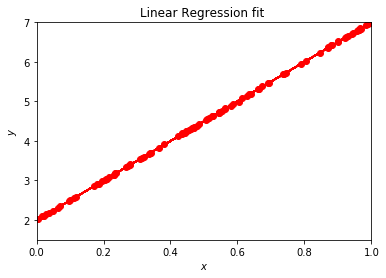

In [7]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error, mean_absolute_error

x = np.random.rand(100,1)
y = 2.0+ 5*x+0.01*np.random.randn(100,1)
linreg = LinearRegression()
linreg.fit(x,y)
ypredict = linreg.predict(x)
print('The intercept alpha: \n', linreg.intercept_)
print('Coefficient beta : \n', linreg.coef_)
# The mean squared error                               
print("Mean squared error: %.2f" % mean_squared_error(y, ypredict))
# Explained variance score: 1 is perfect prediction                                 
print('Variance score: %.2f' % r2_score(y, ypredict))
# Mean squared log error                                                        
print('Mean squared log error: %.2f' % mean_squared_log_error(y, ypredict) )
# Mean absolute error                                                           
print('Mean absolute error: %.2f' % mean_absolute_error(y, ypredict))
plt.plot(x, ypredict, "r-")
plt.plot(x, y ,'ro')
plt.axis([0.0,1.0,1.5, 7.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Linear Regression fit ')
plt.show()

## Functions in **scikit-learn**

The function **coef** gives us the parameter $\beta$ of our fit while **intercept** yields 
$\alpha$. Depending on the constant in front of the normal distribution, we get values near or far from $alpha =2$ and $\beta =5$. Try to play around with different parameters in front of the normal distribution. The function **meansquarederror** gives us the mean square error, a risk metric corresponding to the expected value of the squared (quadratic) error or loss defined as

$$
MSE(\hat{y},\hat{\tilde{y}}) = \frac{1}{n}
\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2,
$$

The smaller the value, the better the fit. Ideally we would like to
have an MSE equal zero.  The attentive reader has probably recognized
this function as being similar to the $\chi^2$ function defined above.

## Other functions in  **scikit-learn**

The **r2score** function computes $R^2$, the coefficient of
determination. It provides a measure of how well future samples are
likely to be predicted by the model. Best possible score is 1.0 and it
can be negative (because the model can be arbitrarily worse). A
constant model that always predicts the expected value of $\hat{y}$,
disregarding the input features, would get a $R^2$ score of $0.0$.

If $\tilde{\hat{y}}_i$ is the predicted value of the $i-th$ sample and $y_i$ is the corresponding true value, then the score $R^2$ is defined as

$$
R^2(\hat{y}, \tilde{\hat{y}}) = 1 - \frac{\sum_{i=0}^{n - 1} (y_i - \tilde{y}_i)^2}{\sum_{i=0}^{n - 1} (y_i - \bar{y})^2},
$$

where we have defined the mean value  of $\hat{y}$ as

$$
\bar{y} =  \frac{1}{n} \sum_{i=0}^{n - 1} y_i.
$$

## The mean absolute error and other functions in  **scikit-learn**

Another quantity will meet again in our discussions of regression analysis is 
 mean absolute error (MAE), a risk metric corresponding to the expected value of the absolute error loss or what we call the $l1$-norm loss. In our discussion above we presented the relative error.
The MAE is defined as follows

$$
\text{MAE}(\hat{y}, \hat{\tilde{y}}) = \frac{1}{n} \sum_{i=0}^{n-1} \left| y_i - \tilde{y}_i \right|.
$$

Finally we present the 
squared logarithmic (quadratic) error

$$
\text{MSLE}(\hat{y}, \hat{\tilde{y}}) = \frac{1}{n} \sum_{i=0}^{n - 1} (\log_e (1 + y_i) - \log_e (1 + \tilde{y}_i) )^2,
$$

where $\log_e (x)$ stands for the natural logarithm of $x$. This error
estimate is best to use when targets having exponential growth, such
as population counts, average sales of a commodity over a span of
years etc. 


## Cubic polynomial in  **scikit-learn**

We will discuss in more
detail these and other functions in the various lectures.  We conclude this part with another example. Instead of 
a linear $x$-dependence we study now a cubic polynomial and use the polynomial regression analysis tools of scikit-learn.

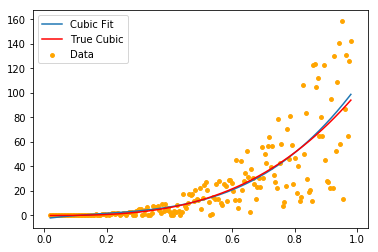

0.004999999999999991


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

x=np.linspace(0.02,0.98,200)
noise = np.asarray(random.sample((range(200)),200))
y=x**3*noise
yn=x**3*100
poly3 = PolynomialFeatures(degree=3)
X = poly3.fit_transform(x[:,np.newaxis])
clf3 = LinearRegression()
clf3.fit(X,y)

Xplot=poly3.fit_transform(x[:,np.newaxis])
poly3_plot=plt.plot(x, clf3.predict(Xplot), label='Cubic Fit')
plt.plot(x,yn, color='red', label="True Cubic")
plt.scatter(x, y, label='Data', color='orange', s=15)
plt.legend()
plt.show()

def error(a):
    for i in y:
        err=(y-yn)/yn
    return abs(np.sum(err))/len(err)

print (error(y))

Similarly, using **R**, we can perform similar studies. 
(more details on **R** will be inserted later).












## Simple regression model with gradient descent
Add info about the equations, play around with different learning rates

[[3.95333266]
 [2.97287919]]
[[3.95333266]
 [2.97287919]]


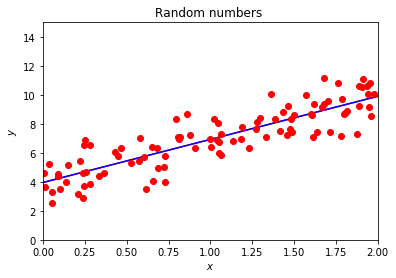

In [9]:
# Importing various packages
from math import exp, sqrt
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt

x = 2*np.random.rand(100,1)
y = 4+3*x+np.random.randn(100,1)

xb = np.c_[np.ones((100,1)), x]
theta_linreg = np.linalg.inv(xb.T.dot(xb)).dot(xb.T).dot(y)
print(theta_linreg)
theta = np.random.randn(2,1)

eta = 0.1
Niterations = 1000
m = 100

for iter in range(Niterations):
    gradients = 2.0/m*xb.T.dot(xb.dot(theta)-y)
    theta -= eta*gradients

print(theta)
xnew = np.array([[0],[2]])
xbnew = np.c_[np.ones((2,1)), xnew]
ypredict = xbnew.dot(theta)
ypredict2 = xbnew.dot(theta_linreg)
plt.plot(xnew, ypredict, "r-")
plt.plot(xnew, ypredict2, "b-")
plt.plot(x, y ,'ro')
plt.axis([0,2.0,0, 15.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Random numbers ')
plt.show()

## Simple regression model with stochastic gradient descent
Add info about the equations, play around with different learning rates

In [9]:
# Importing various packages
from math import exp, sqrt
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor

x = 2*np.random.rand(100,1)
y = 4+3*x+np.random.randn(100,1)

xb = np.c_[np.ones((100,1)), x]
theta_linreg = np.linalg.inv(xb.T.dot(xb)).dot(xb.T).dot(y)
print(theta_linreg)
sgdreg = SGDRegressor(n_iter = 50, penalty=None, eta0=0.1)
sgdreg.fit(x,y.ravel())
print(sgdreg.intercept_, sgdreg.coef_)

## Polynomial Regression

In [10]:
# Importing various packages
from math import exp, sqrt
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt

m = 100
x = 2*np.random.rand(m,1)+4.
y = 4+3*x*x+ +x-np.random.randn(m,1)

xb = np.c_[np.ones((m,1)), x]
theta = np.linalg.inv(xb.T.dot(xb)).dot(xb.T).dot(y)
xnew = np.array([[0],[2]])
xbnew = np.c_[np.ones((2,1)), xnew]
ypredict = xbnew.dot(theta)

plt.plot(xnew, ypredict, "r-")
plt.plot(x, y ,'ro')
plt.axis([0,2.0,0, 15.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Random numbers ')
plt.show()

## Ridge and Lasso Regression

X_train:  (37, 1)
y_train:  (37,)
X_test:  (13, 1)
y_test:  (13,)
------------------------------------
Ordinary Least Squares
Prediction Shape:  (13,)
Coefficients: 
 [0.48377624]
Mean squared error: 2.38
Variance score: 0.55


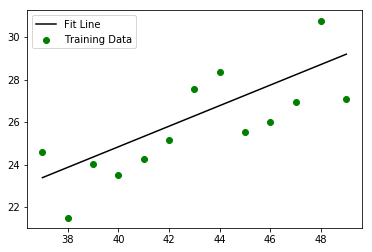

------------------------------------
Ridge Regression
Ridge Coefficient:  [0.48263202]
Ridge Intercept:  5.507994331002207
------------------------------------
Lasso
Lasso Coefficient:  [0.48289905]
Lasso Intercept:  5.50318784374401


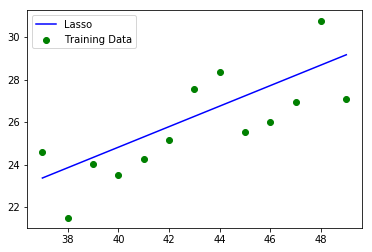

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#creating data with random noise
x=np.arange(50)

delta=np.random.uniform(-2.5,2.5, size=(50))
np.random.shuffle(delta)
y =0.5*x+5+delta

#arranging data into 2x50 matrix
a=np.array(x) #inputs
b=np.array(y) #outputs

#Split into training and test
X_train=a[:37, np.newaxis]
X_test=a[37:, np.newaxis]
y_train=b[:37]
y_test=b[37:]

print ("X_train: ", X_train.shape)
print ("y_train: ", y_train.shape)
print ("X_test: ", X_test.shape)
print ("y_test: ", y_test.shape)

print ("------------------------------------")

print ("Ordinary Least Squares")
#Add Ordinary Least Squares fit
reg=LinearRegression()
reg.fit(X_train, y_train)
pred=reg.predict(X_test)
print ("Prediction Shape: ", pred.shape)

print('Coefficients: \n', reg.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, pred))

#plot
plt.scatter(X_test,y_test,color='green', label="Training Data")
plt.plot(X_test, pred, color='black', label="Fit Line")
plt.legend()
plt.show()

print ("------------------------------------")

print ("Ridge Regression")

ridge=linear_model.RidgeCV(alphas=[0.1,1.0,10.0])
ridge.fit(X_train,y_train)
print ("Ridge Coefficient: ",ridge.coef_)
print ("Ridge Intercept: ", ridge.intercept_)
#Look into graphing with Ridge fit

print ("------------------------------------")

print ("Lasso")
lasso=linear_model.Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
predl=lasso.predict(X_test)
print("Lasso Coefficient: ", lasso.coef_)
print("Lasso Intercept: ", lasso.intercept_)
plt.scatter(X_test,y_test,color='green', label="Training Data")
plt.plot(X_test, predl, color='blue', label="Lasso")
plt.legend()
plt.show()

## The singular value decompostion
How can we use the singular value decomposition to find the parameters $\beta_j$? More details will come. We first note that a general $m\times n$ matrix $\hat{A}$ can be written in terms of a diagonal matrix $\hat{\Sigma}$ of dimensionality $n\times n$ and two orthognal matrices $\hat{U}$ and $\hat{V}$, where the first has dimensionality $m \times n$ and the last dimensionality $n\times n$. We have then

$$
\hat{A} = \hat{U}\hat{\Sigma}\hat{V}
$$

Add codes and discuss this in connection with lasso and ridge, show example where the standard inversion of a matrix fails and where SVD comes to rescue


## Lasso and Ridge regression

Discuss the mathematics here

## Logistic regression
Add discussion about classification versus regression, show examples of more than two cases and why regression is not the best approach. Motivate for k-nearest neighbors

Add examples on classification problems